**Functions for Manual Encoding**

In [1]:
def OS_transform(df,col):
    df.loc[df[col].str.contains('Windows', na=False), col] = 'Windows'
    df.loc[df[col].str.contains('iOS', na=False), col] = 'iOS'
    df.loc[df[col].str.contains('Mac OS', na=False), col] = 'Mac'
    df.loc[df[col].str.contains('Android', na=False), col] = 'Android'
    df[col].fillna("Missing", inplace=True)
    return df

In [2]:
def mail_transform(df,col):
    df.loc[df[col].str.contains('gmail', na=False), col] = 'Google'
    df.loc[df[col].str.contains('yahoo', na=False), col] = 'Yahoo'
    df.loc[df[col].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr', 'hotmail.fr']), col] = 'Microsoft'
    df.loc[df[col].str.contains('outlook', na=False), col] = 'Microsoft'
    df.loc[df[col].str.contains('msn', na=False), col] = 'Microsoft'
    df.loc[df[col].str.contains('live', na=False), col] = 'Microsoft'
    df[col].fillna("Missing", inplace=True)
    return df

In [3]:
def browser_transform(df,col):
    df.loc[df[col].str.contains('opera', na=False), col] = 'Opera'
    df.loc[df[col].str.contains('safari', na=False), col] = 'Safari'
    df.loc[df[col].str.contains('edge', na=False), col] = 'Microsoft'
    df.loc[df[col].str.contains('chrome', na=False), col] = 'Google Chrome'
    df.loc[df[col].str.contains('firefox', na=False), col] = 'Firefox'
    df[col].fillna("Missing", inplace=True)
    return df

In [4]:
def resol_transform(df,col):
    df.loc[df[col].isin(['3839x2160', '3001x2000', '4500x3000', '3000x2000', '4096x2304', '5120x2880', '3840x2160', '2732x2048', '3360x2100']), col] = '4K'
    df.loc[df[col].isin(['2048x1280', '3840x1080', '2049x1152', '1919x1199', '2000x1125', '2672x1440', '2700x1800', '2880x1440', '2561x1442', '1919x1080', '2400x1350', '2562x1442', '2076x1080', '3440x1440', '2112x1188', '2560x1080', '1921x1081', '1920x1281', '3201x1800', '2160x1440', '2960x1440', '2961x1442', '3200x1800', '2224x1668', '2736x1824', '1600x1200', '2220x1081', '2220x1080', '1920x1200', '2880x1800', '2560x1440', '2001x1125', '2560x1600', '2048x1536', '2436x1125', '2208x1242', '1920x1080']), col] = 'Full HD'
    df.loc[df[col].isin(['1638x922', '1280x1023', '1680x1051', '1440x759', '1600x899', '1728x972', '1344x756', '1279x1024', '1679x1049', '1365x767', '1600x837', '1280x1025', '1184x720', '1440x810', '1502x844', '1768x992', '1916x901', '1919x1079', '1920x975', '1280x768', '1536x864', '1152x864', '1366x767', '1364x768', '1365x768', '1360x768', '1024x768', '1680x1050', '1280x1024', '1280x800', '1280x720', '1600x900', '1440x900', '1334x750', '1366x768']), col] = 'HD'
    df.loc[df[col].isin(['1062x630', '800x600', '1280x712', '1024x640', '960x540', '1024x552', '640x360', '801x480', '1024x600', '855x480', '1136x640']),col] = 'SD'
    df[col].fillna("Missing", inplace=True)
    return df

In [5]:
def device_transform(df,col):
    df.loc[df[col].isin(df[col].value_counts()[df[col].value_counts() <= 500 ].index), col] = 'Others'
    df[col].fillna("Missing", inplace=True)
    return df

**Overview Function**

In [6]:
def overview(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values 
    summary['Missing_Percent'] = (df.isnull().sum().values/len(df))*100
    summary['Uniques'] = df.nunique().values
    return summary

## <font color='green'> Importing Required Libraries

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
sns.set_style("whitegrid")

In [8]:
class Font:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### <font color = 'green'> Loading Sample Data

In [9]:
df = pd.read_csv('resampled_train.csv',index_col='TransactionID')

#### <font color= 'brown'> Splitting the Data to Train, Validation and Test Data**

In [10]:
y = df['isFraud']
X = df.drop('isFraud', axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [13]:
X_train = pd.concat([X_train, y_train], axis=1)

In [14]:
X_train.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3264517,6743982,29.00,W,9500,321.0,150.0,visa,226.0,debit,204.0,87.0,3.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,63.0,NaN,62.0,0.0,NaN,NaN,NaN,NaN,NaN,62.0,0.0,NaN,NaN,NaN,62.0,T,T,T,M0,T,T,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

In [13]:
print(Font.BLUE, Font.BOLD, "Shape of Train Data      : ",Font.END, Font.BOLD, X_train.shape)
print(Font.BLUE, Font.BOLD, "Shape of Validation Data : ", Font.END, Font.BOLD, X_val.shape)
print(Font.BLUE, Font.BOLD, "Shape of Test Data       : ", Font.END, Font.BOLD, X_test.shape)

  Shape of Train Data      :    (24707, 432)
  Shape of Validation Data :    (8236, 432)
  Shape of Test Data       :    (8236, 432)


#### <font color= 'brown'> Creating a List for Categorical Variables

* **cat_var        :** List of All Categorical Variables

In [15]:
cat_var = ['card4', 'card6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'dist1', 'dist2', 'D2', 'D3', 'D11', 'D9', 'D12', 'D13', 'D14', 'D5', 'D6', 'D7', 'D8', 'id_01', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P_emaildomain', 'ProductCD', 'R_emaildomain', 'V1', 'V10', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V11', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V12', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V13', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V14', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V15', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V16', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V17', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V18', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V19', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V2', 'V20', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V21', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V22', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V23', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V24', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V25', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V26', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V27', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V28', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V29', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V3', 'V30', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V31', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V32', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V33', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V5', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V6', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V7', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V8', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V9', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

#### <font color= 'brown'> Creating a List for Numerical Variables

* **num_var        :** List of All Numerical Variables

In [16]:
num_var = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'id_02', 'D1', 'D2', 'D3', 'D4', 'D10', 'D11', 'D15']

#### <font color= 'brown'> Custom Value Imputaion List, based on category type & Suggested imputation

* **cv_impute_num  :** Numeric Type - Categorical List, for Custom Value Imputation
* **cv_impute_char :** Character Type - Categorical List, for Custom Value Imputation
* **num_impute     :** List of All Numerical Variables, which undergo missing value treatment. Ex: Mean, Median etc.,

In [17]:
cv_impute_num = [ 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'dist1', 'dist2', 'D2', 'D3', 'D11', 'D12', 'D13', 'D14', 'D5', 'D6', 'D7', 'D8', 'D9',  'V1', 'V10', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V11', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V12', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V13', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V14', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V15', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V16', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V17', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V18', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V19', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V2', 'V20', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V21', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V22', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V23', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V24', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V25', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V26', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V27', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V28', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V29', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V3', 'V30', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V31', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V32', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V33', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V5', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V6', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V7', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V8', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V9', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99']
cv_impute_char = ['ProductCD', 'P_emaildomain', 'R_emaildomain', 'card4', 'card6',  'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_30', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'id_01', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29','id_32', 'id_33', 'id_34']
num_impute = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'id_02', 'D1', 'D4', 'D10', 'D15']

#### <font color= 'brown'> List for rare category Imputation

* **rare_5         :** List of variables to undergo Rare Encoding with 5%
* **rare_10        :** List of variables to undergo Rare Encoding with 10%

In [18]:
rare_5 = ['dist1', 'dist2', 'D2', 'D3', 'D11', 'C3', 'C4', 'C5', 'C7', 'C8', 'C9', 'C12', 'V252', 'V253', 'V254', 'V260', 'V261', 'V262', 'V281', 'V286', 'V287', 'V288', 'V289', 'V290', 'V297', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V322', 'V323', 'V324', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'V279', 'V283', 'V291', 'V292', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'card4', 'card6', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'id_01', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'V98', 'V104', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V125',  'V96', 'V97', 'V99', 'V101', 'V102', 'V103', 'V105', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V143', 'V144', 'V145', 'V150', 'V151', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174',  'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182',  'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214',  'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230','V231','V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238','V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'D5', 'D7', 'D8', 'D9', 'D14', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
rare_10 = ['C1', 'C2', 'C6', 'C10', 'C11', 'C13', 'C14', 'V255', 'V256', 'V282', 'V284', 'V257', 'V258', 'V259', 'V280', 'V285', 'V293', 'V294', 'V295', 'V296', 'V298', 'ProductCD', 'P_emaildomain', 'R_emaildomain', 'V12', 'V25',  'V124', 'V139', 'V140', 'V148', 'V149', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158',  'V95', 'V221', 'V222', 'V245', 'V250', 'V251', 'D6', 'D12', 'D13', 'M2', 'M7', 'M9']

#### <font color= 'brown'>  Drop Variable List

* **drop_var        :** List of variables to be dropped

In [19]:
drop_var = ['V305', 'id_24', 'id_25']

#### <font color= 'brown'> Edge Variables

* **edge_var        :** Variables at the Edge to be analysed

In [20]:
edge_var = ['V4','V5','V39','V40','V42','V43','V50','V51','V52''V57','V58','V69','V60','V71','V74','V53','V54','V55','V56','V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67', 'V68','V69','V70']

#### <font color= 'brown'> Missing Value Labelling

**miss_label  :** Missing label for group of variables

* **V1 :**  [V1-V11]
* **V12 :**  [V12-V34]
* **V35 :**  [V35-V52]
* **V53 :**  [V53-V74]
* **V75 :**  [V75-V94]


In [21]:
miss_label = ['V1', 'V12', 'V35', 'V53', 'V75']

In [22]:
df_list = X_train[cv_impute_num].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .98])

**Function to Create Bins with percentiles**

In [23]:
param_dict_ = {}
des_list = {}
for i in cv_impute_num:
    des_list[i] = X_train[i].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .98])
    des_list[i].drop([ 'count', 'std', 'mean', 'min'], inplace = True)
    param_dict_[i] = list(set(des_list[i].tolist()))
    b = param_dict_[i]
    b.sort()
    X_train[str(i) +'_bins'] = pd.cut(x=X_train[i], bins = b, include_lowest=True)
    X_train[str(i) +'_bins'] = X_train[str(i) +'_bins'].astype('object')
    X_train[str(i) +'_bins'].fillna('Missing', inplace = True)

## EDA

In [44]:
from fast_ml.eda import numerical_variable_detail, numerical_plots, numerical_plots_with_target 
from fast_ml.eda import categorical_plots, categorical_plots_with_target, categorical_plots_with_rare_and_target, categorical_plots_for_miss_and_freq, categorical_variable_detail

**categorical_variable_detail**

**<u>Basic Info :</u>**

Total Number of observations :  24707



**<u>Cardinality of the variable :</u>**

Number of Distinct Categories (Cardinality):  639
Few of the values :  [ nan 371. 548.  51.   4. 124.   3.   7.  42. 211.  87. 267. 127.  14.
 275. 270.   1. 151. 148.  63.   0.   6.   2.  19. 215.  56. 138.  10.
  15. 159. 302. 509. 462. 133. 389. 131. 155. 451. 518.  99.  11.  52.
 191.  12. 231.  61. 557.  32.  71.  78.]



**<u>Missing Values :</u>**

  Number : 13680
  Percentage : 55.368923786781075 %


**<u>Category Plots :</u>**

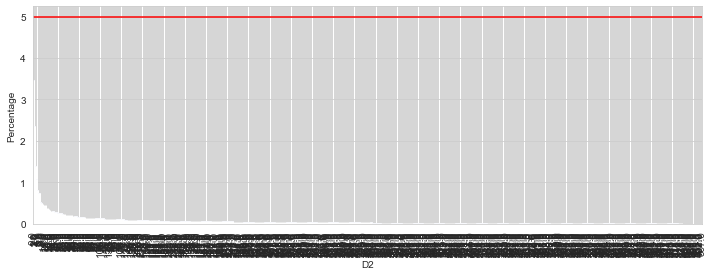

**<u>Category plot by including Missing Values**

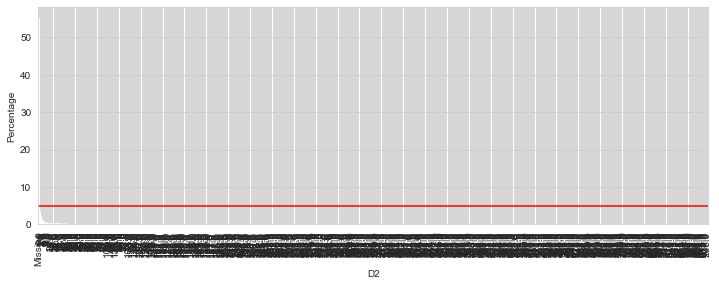

**<u>Category plot by including missing (if any) and Rare labels**

Categories less than 5 value are clubbed in Rare label


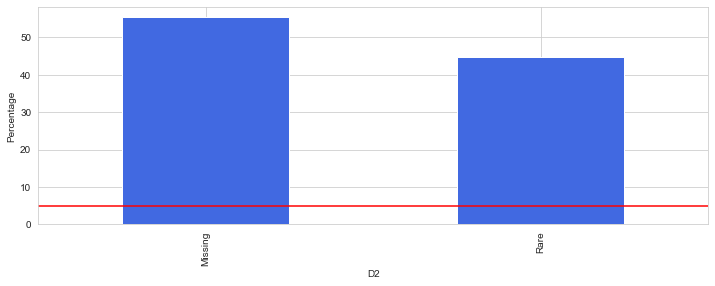

In [29]:
categorical_variable_detail(X_train, 'D2')

**<u>Basic Info :</u>**

Total Number of observations :  24707



**<u>Cardinality of the variable :</u>**

Number of Distinct Categories (Cardinality):  12
Distinct Values :  ['Missing' Interval(248.0, 408.0, closed='right')
 Interval(511.0, 574.0, closed='right')
 Interval(28.0, 54.0, closed='right') Interval(0.999, 4.0, closed='right')
 Interval(91.0, 155.0, closed='right') Interval(4.0, 13.0, closed='right')
 Interval(155.0, 248.0, closed='right')
 Interval(54.0, 91.0, closed='right') Interval(13.0, 28.0, closed='right')
 Interval(408.0, 511.0, closed='right')
 Interval(574.0, 639.0, closed='right')]



**<u>Missing Values :</u>**

  Number : 0
  Percentage : 0.0 %


**<u>Category Plots :</u>**

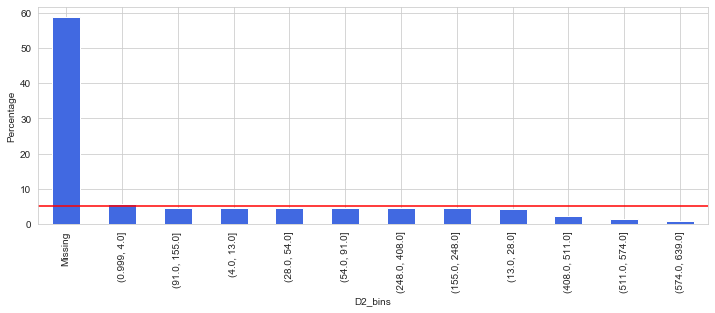

**<u>Category plot by including missing (if any) and Rare labels**

Categories less than 5 value are clubbed in Rare label


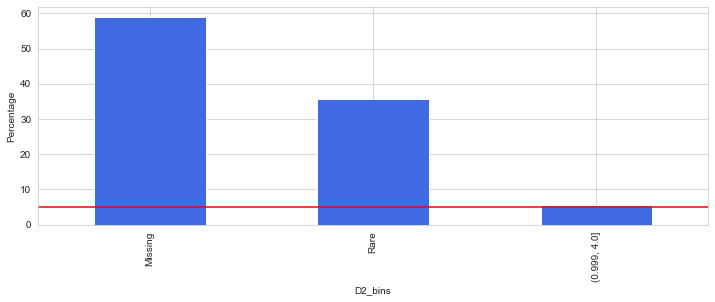

In [35]:
categorical_variable_detail(X_train, 'D2_bins')

**categorical_plots**

**<u> 1. Plot for D2</u>**

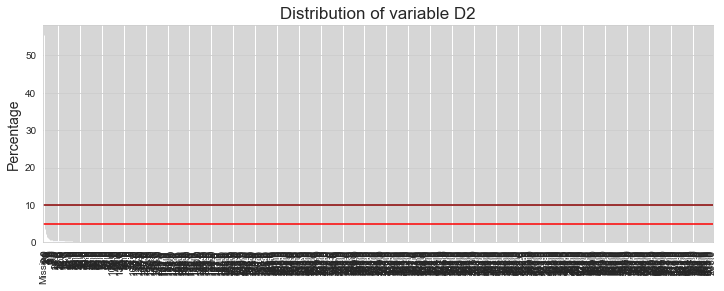

In [32]:
categorical_plots(X_train, ['D2'])

**<u> 1. Plot for D2_bins</u>**

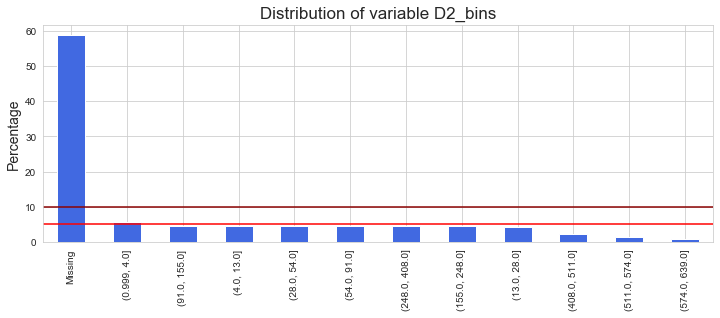

In [37]:
categorical_plots(X_train, ['D2_bins'])

**categorical_plots_with_rare_and_target**

1. Plot for D2


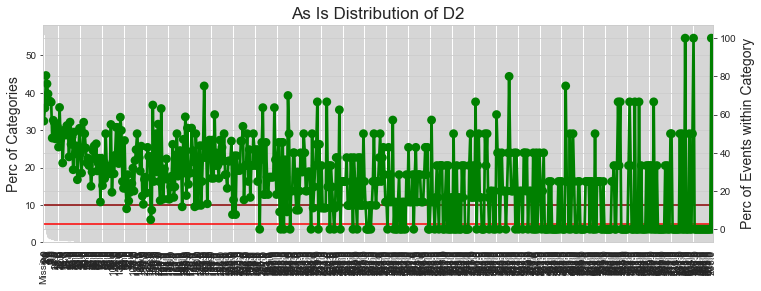

D2,Missing,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,14.0,28.0,11.0,12.0,10.0,15.0,22.0,42.0,17.0,13.0,19.0,24.0,25.0,21.0,18.0,27.0,31.0,29.0,23.0,26.0,32.0,35.0,63.0,33.0,30.0,43.0,56.0,16.0,36.0,40.0,49.0,46.0,50.0,41.0,34.0,57.0,20.0,62.0,38.0,90.0,58.0,61.0,64.0,69.0,55.0,73.0,54.0,70.0,88.0,51.0,91.0,87.0,39.0,60.0,68.0,101.0,48.0,52.0,67.0,59.0,75.0,154.0,133.0,65.0,53.0,84.0,85.0,45.0,66.0,37.0,92.0,78.0,72.0,47.0,103.0,44.0,76.0,77.0,132.0,122.0,119.0,120.0,166.0,98.0,71.0,89.0,97.0,217.0,182.0,83.0,147.0,126.0,86.0,160.0,150.0,79.0,93.0,212.0,118.0,99.0,214.0,144.0,158.0,102.0,152.0,155.0,141.0,175.0,134.0,138.0,105.0,96.0,111.0,174.0,125.0,107.0,159.0,168.0,196.0,149.0,106.0,124.0,185.0,112.0,246.0,245.0,145.0,280.0,81.0,128.0,176.0,179.0,140.0,129.0,148.0,108.0,82.0,95.0,139.0,115.0,362.0,114.0,181.0,74.0,161.0,366.0,123.0,151.0,94.0,153.0,80.0,113.0,197.0,187.0,173.0,191.0,167.0,177.0,195.0,224.0,189.0,193.0,100.0,127.0,276.0,117.0,110.0,192.0,546.0,484.0,222.0,194.0,311.0,210.0,252.0,200.0,240.0,213.0,455.0,172.0,109.0,211.0,186.0,481.0,388.0,146.0,135.0,169.0,529.0,178.0,170.0,275.0,188.0,104.0,198.0,487.0,157.0,136.0,116.0,301.0,457.0,165.0,143.0,184.0,121.0,183.0,225.0,259.0,227.0,287.0,256.0,219.0,302.0,239.0,283.0,286.0,202.0,255.0,349.0,249.0,363.0,365.0,162.0,218.0,568.0,288.0,205.0,399.0,171.0,290.0,314.0,264.0,164.0,208.0,510.0,231.0,243.0,220.0,274.0,260.0,238.0,475.0,250.0,352.0,364.0,265.0,389.0,130.0,253.0,394.0,545.0,570.0,233.0,315.0,294.0,237.0,221.0,331.0,574.0,489.0,216.0,180.0,190.0,437.0,356.0,137.0,518.0,469.0,163.0,385.0,462.0,395.0,380.0,454.0,448.0,442.0,206.0,381.0,429.0,258.0,226.0,244.0,501.0,254.0,235.0,477.0,495.0,248.0,509.0,432.0,370.0,376.0,267.0,526.0,293.0,262.0,579.0,336.0,295.0,573.0,332.0,266.0,261.0,268.0,537.0,271.0,338.0,552.0,279.0,199.0,321.0,530.0,535.0,503.0,334.0,346.0,337.0,419.0,418.0,360.0,359.0,515.0,309.0,504.0,482.0,369.0,512.0,379.0,514.0,307.0,478.0,343.0,491.0,490.0,483.0,637.0,554.0,406.0,330.0,300.0,567.0,297.0,131.0,203.0,204.0,251.0,228.0,229.0,285.0,242.0,156.0,207.0,273.0,318.0,339.0,329.0,387.0,396.0,534.0,542.0,398.0,400.0,278.0,322.0,610.0,601.0,320.0,347.0,428.0,241.0,616.0,505.0,577.0,621.0,351.0,234.0,272.0,292.0,308.0,368.0,582.0,303.0,371.0,296.0,304.0,345.0,636.0,435.0,374.0,223.0,544.0,502.0,209.0,444.0,383.0,397.0,390.0,375.0,413.0,575.0,431.0,421.0,556.0,561.0,499.0,522.0,459.0,497.0,524.0,466.0,531.0,474.0,476.0,486.0,493.0,405.0,358.0,415.0,408.0,402.0,350.0,401.0,353.0,247.0,354.0,215.0,355.0,426.0,386.0,580.0,382.0,377.0,410.0,393.0,420.0,342.0,585.0,427.0,433.0,434.0,372.0,511.0,578.0,631.0,232.0,532.0,608.0,447.0,467.0,528.0,445.0,323.0,270.0,550.0,324.0,277.0,479.0,470.0,142.0,291.0,310.0,517.0,626.0,281.0,520.0,472.0,471.0,451.0,392.0,373.0,201.0,416.0,417.0,403.0,384.0,325.0,425.0,328.0,430.0,438.0,312.0,327.0,456.0,305.0,335.0,344.0,488.0,480.0,473.0,306.0,263.0,361.0,289.0,461.0,460.0,441.0,453.0,298.0,378.0,230.0,593.0,508.0,560.0,558.0,559.0,605.0,551.0,576.0,547.0,541.0,584.0,316.0,513.0,572.0,628.0,607.0,622.0,569.0,618.0,563.0,449.0,450.0,519.0,391.0,299.0,599.0,333.0,564.0,583.0,533.0,586.0,538.0,596.0,539.0,340.0,549.0,543.0,540.0,525.0,536.0,527.0,465.0,523.0,555.0,439.0,516.0,557.0,423.0,422.0,409.0,565.0,566.0,498.0,367.0,581.0,348.0,341.0,452.0,468.0,594.0,492.0,625.0,494.0,598.0,602.0,617.0,269.0,326.0,609.0,590.0,282.0,620.0,284.0,317.0,627.0,630.0,632.0,634.0,635.0,591.0,500.0,587.0,443.0,629.0,496.0,313.0,464.0,319.0,412.0,440.0,411.0,424.0,414.0,639.0,446.0,521.0,485.0,597.0,257.0,613.0,571.0,548.0,463.0,623.0,638.0,612.0,611.0,604.0,603.0,600.0,506.0,507.0,436.0,553.0,562.0,588.0,589.0,592.0,614.0,458.0,606.0,404.0,357.0,615.0,619.0,624.0,407.0,236.0
count,13680.000000,856.000000,583.000000,343.000000,264.000000,199.000000,185.000000,182.000000,132.000000,121.000000,118.000000,112.000000,110.000000,110.000000,93.000000,91.000000,85.000000,83.000000,75.000000,75.000000,73.000000,71.000000,70.000000,68.000000,66.000000

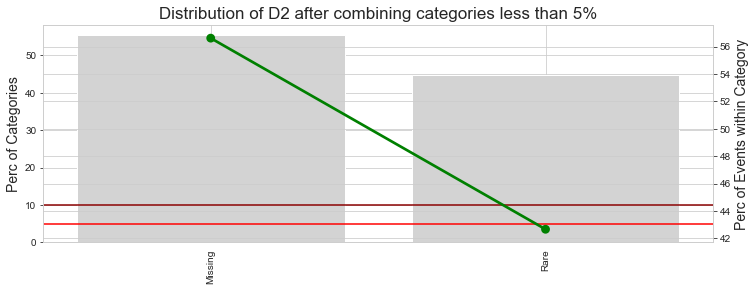

D2,Missing,Rare
count,13680.000000,11027.000000
perc,55.368924,44.631076
isFraud,56.615497,42.658928


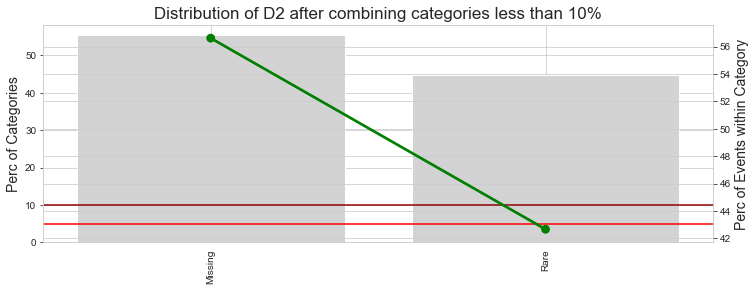

D2,Missing,Rare
count,13680.000000,11027.000000
perc,55.368924,44.631076
isFraud,56.615497,42.658928


In [30]:
categorical_plots_with_rare_and_target(X_train, ['D2'], target = 'isFraud')

1. Plot for D2_bins


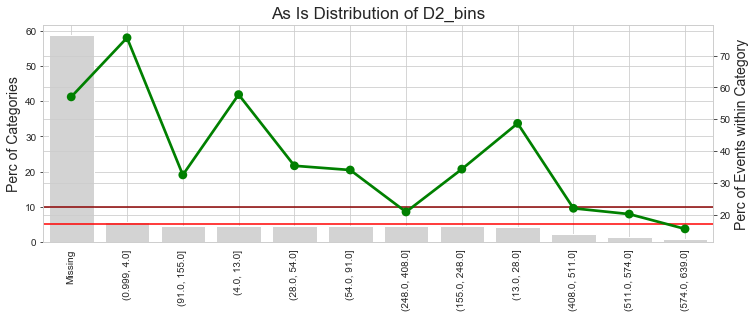

D2_bins,Missing,"(0.999, 4.0]","(91.0, 155.0]","(4.0, 13.0]","(28.0, 54.0]","(54.0, 91.0]","(248.0, 408.0]","(155.0, 248.0]","(13.0, 28.0]","(408.0, 511.0]","(511.0, 574.0]","(574.0, 639.0]"
count,14536.000000,1389.000000,1111.000000,1105.000000,1103.000000,1099.000000,1098.000000,1093.000000,1072.000000,550.00000,332.000000,219.000000
perc,58.833529,5.621889,4.496701,4.472417,4.464322,4.448132,4.444085,4.423847,4.338851,2.22609,1.343749,0.886388
isFraud,57.017061,75.593952,32.493249,57.737557,35.358114,34.030937,20.856102,34.309241,48.694030,22.00000,20.180723,15.525114


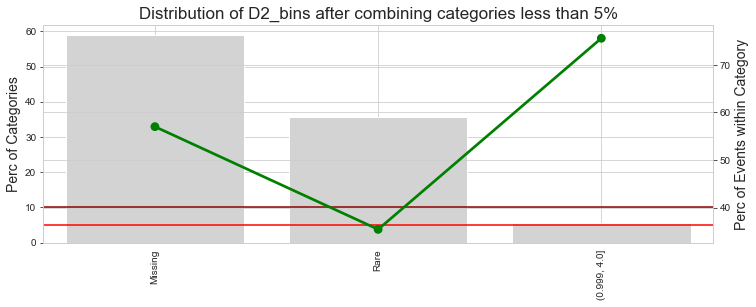

D2_bins,Missing,Rare,"(0.999, 4.0]"
count,14536.000000,8782.000000,1389.000000
perc,58.833529,35.544583,5.621889
isFraud,57.017061,35.424732,75.593952


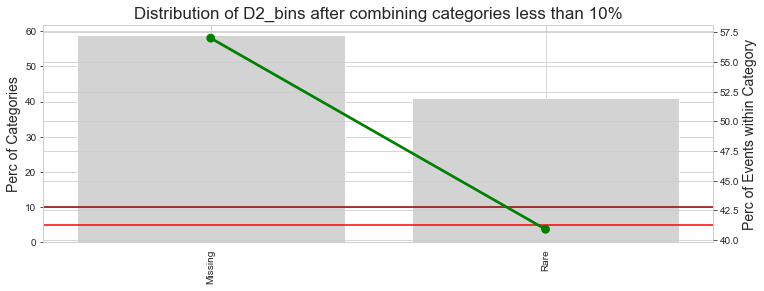

D2_bins,Missing,Rare
count,14536.000000,10171.000000
perc,58.833529,41.166471
isFraud,57.017061,40.910432


In [36]:
categorical_plots_with_rare_and_target(X_train, ['D2_bins'], target = 'isFraud')

**categorical_plots_with_target**

**<u> 1. Plot for D2</u>**

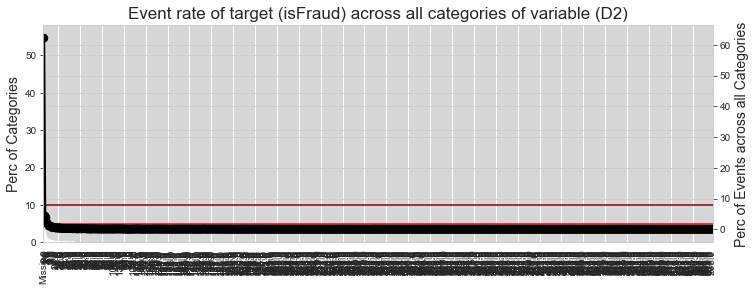

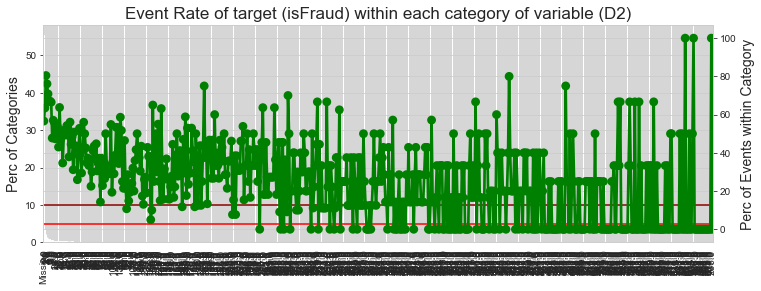

D2,Missing,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,14.0,28.0,11.0,12.0,10.0,15.0,22.0,42.0,17.0,13.0,19.0,24.0,25.0,21.0,18.0,27.0,31.0,29.0,23.0,26.0,32.0,35.0,63.0,33.0,30.0,43.0,56.0,16.0,36.0,40.0,49.0,46.0,50.0,41.0,34.0,57.0,20.0,62.0,38.0,90.0,58.0,61.0,64.0,69.0,55.0,73.0,54.0,70.0,88.0,51.0,91.0,87.0,39.0,60.0,68.0,101.0,48.0,52.0,67.0,59.0,75.0,154.0,133.0,65.0,53.0,84.0,85.0,45.0,66.0,37.0,92.0,78.0,72.0,47.0,103.0,44.0,76.0,77.0,132.0,122.0,119.0,120.0,166.0,98.0,71.0,89.0,97.0,217.0,182.0,83.0,147.0,126.0,86.0,160.0,150.0,79.0,93.0,212.0,118.0,99.0,214.0,144.0,158.0,102.0,152.0,155.0,141.0,175.0,134.0,138.0,105.0,96.0,111.0,174.0,125.0,107.0,159.0,168.0,196.0,149.0,106.0,124.0,185.0,112.0,246.0,245.0,145.0,280.0,81.0,128.0,176.0,179.0,140.0,129.0,148.0,108.0,82.0,95.0,139.0,115.0,362.0,114.0,181.0,74.0,161.0,366.0,123.0,151.0,94.0,153.0,80.0,113.0,197.0,187.0,173.0,191.0,167.0,177.0,195.0,224.0,189.0,193.0,100.0,127.0,276.0,117.0,110.0,192.0,546.0,484.0,222.0,194.0,311.0,210.0,252.0,200.0,240.0,213.0,455.0,172.0,109.0,211.0,186.0,481.0,388.0,146.0,135.0,169.0,529.0,178.0,170.0,275.0,188.0,104.0,198.0,487.0,157.0,136.0,116.0,301.0,457.0,165.0,143.0,184.0,121.0,183.0,225.0,259.0,227.0,287.0,256.0,219.0,302.0,239.0,283.0,286.0,202.0,255.0,349.0,249.0,363.0,365.0,162.0,218.0,568.0,288.0,205.0,399.0,171.0,290.0,314.0,264.0,164.0,208.0,510.0,231.0,243.0,220.0,274.0,260.0,238.0,475.0,250.0,352.0,364.0,265.0,389.0,130.0,253.0,394.0,545.0,570.0,233.0,315.0,294.0,237.0,221.0,331.0,574.0,489.0,216.0,180.0,190.0,437.0,356.0,137.0,518.0,469.0,163.0,385.0,462.0,395.0,380.0,454.0,448.0,442.0,206.0,381.0,429.0,258.0,226.0,244.0,501.0,254.0,235.0,477.0,495.0,248.0,509.0,432.0,370.0,376.0,267.0,526.0,293.0,262.0,579.0,336.0,295.0,573.0,332.0,266.0,261.0,268.0,537.0,271.0,338.0,552.0,279.0,199.0,321.0,530.0,535.0,503.0,334.0,346.0,337.0,419.0,418.0,360.0,359.0,515.0,309.0,504.0,482.0,369.0,512.0,379.0,514.0,307.0,478.0,343.0,491.0,490.0,483.0,637.0,554.0,406.0,330.0,300.0,567.0,297.0,131.0,203.0,204.0,251.0,228.0,229.0,285.0,242.0,156.0,207.0,273.0,318.0,339.0,329.0,387.0,396.0,534.0,542.0,398.0,400.0,278.0,322.0,610.0,601.0,320.0,347.0,428.0,241.0,616.0,505.0,577.0,621.0,351.0,234.0,272.0,292.0,308.0,368.0,582.0,303.0,371.0,296.0,304.0,345.0,636.0,435.0,374.0,223.0,544.0,502.0,209.0,444.0,383.0,397.0,390.0,375.0,413.0,575.0,431.0,421.0,556.0,561.0,499.0,522.0,459.0,497.0,524.0,466.0,531.0,474.0,476.0,486.0,493.0,405.0,358.0,415.0,408.0,402.0,350.0,401.0,353.0,247.0,354.0,215.0,355.0,426.0,386.0,580.0,382.0,377.0,410.0,393.0,420.0,342.0,585.0,427.0,433.0,434.0,372.0,511.0,578.0,631.0,232.0,532.0,608.0,447.0,467.0,528.0,445.0,323.0,270.0,550.0,324.0,277.0,479.0,470.0,142.0,291.0,310.0,517.0,626.0,281.0,520.0,472.0,471.0,451.0,392.0,373.0,201.0,416.0,417.0,403.0,384.0,325.0,425.0,328.0,430.0,438.0,312.0,327.0,456.0,305.0,335.0,344.0,488.0,480.0,473.0,306.0,263.0,361.0,289.0,461.0,460.0,441.0,453.0,298.0,378.0,230.0,593.0,508.0,560.0,558.0,559.0,605.0,551.0,576.0,547.0,541.0,584.0,316.0,513.0,572.0,628.0,607.0,622.0,569.0,618.0,563.0,449.0,450.0,519.0,391.0,299.0,599.0,333.0,564.0,583.0,533.0,586.0,538.0,596.0,539.0,340.0,549.0,543.0,540.0,525.0,536.0,527.0,465.0,523.0,555.0,439.0,516.0,557.0,423.0,422.0,409.0,565.0,566.0,498.0,367.0,581.0,348.0,341.0,452.0,468.0,594.0,492.0,625.0,494.0,598.0,602.0,617.0,269.0,326.0,609.0,590.0,282.0,620.0,284.0,317.0,627.0,630.0,632.0,634.0,635.0,591.0,500.0,587.0,443.0,629.0,496.0,313.0,464.0,319.0,412.0,440.0,411.0,424.0,414.0,639.0,446.0,521.0,485.0,597.0,257.0,613.0,571.0,548.0,463.0,623.0,638.0,612.0,611.0,604.0,603.0,600.0,506.0,507.0,436.0,553.0,562.0,588.0,589.0,592.0,614.0,458.0,606.0,404.0,357.0,615.0,619.0,624.0,407.0,236.0
count,13680.000000,856.000000,583.000000,343.000000,264.000000,199.000000,185.000000,182.000000,132.000000,121.000000,118.000000,112.000000,110.000000,110.000000,93.000000,91.000000,85.000000,83.000000,75.000000,75.000000,73.000000,71.000000,70.000000,68.000000,66.000000

In [34]:
categorical_plots_with_target(X_train, ['D2'], target = 'isFraud')

**<u> 1. Plot for D2_bins</u>**

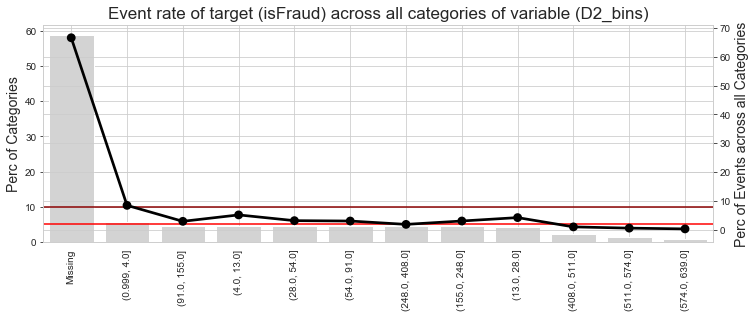

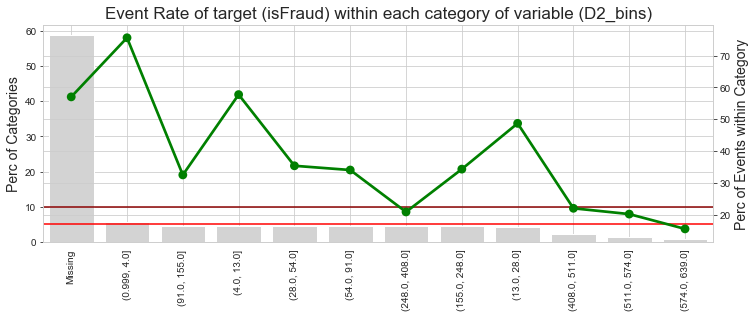

D2_bins,Missing,"(0.999, 4.0]","(91.0, 155.0]","(4.0, 13.0]","(28.0, 54.0]","(54.0, 91.0]","(248.0, 408.0]","(155.0, 248.0]","(13.0, 28.0]","(408.0, 511.0]","(511.0, 574.0]","(574.0, 639.0]"
count,14536.000000,1389.000000,1111.000000,1105.000000,1103.000000,1099.000000,1098.000000,1093.000000,1072.000000,550.00000,332.000000,219.000000
perc,58.833529,5.621889,4.496701,4.472417,4.464322,4.448132,4.444085,4.423847,4.338851,2.22609,1.343749,0.886388
isFraud,57.017061,75.593952,32.493249,57.737557,35.358114,34.030937,20.856102,34.309241,48.694030,22.00000,20.180723,15.525114


In [38]:
categorical_plots_with_target(X_train, ['D2_bins'], target = 'isFraud')

## Numerical Variables

In [39]:
param_dict1_ = {}
des_list1 = {}
for i in num_var:
    des_list1[i] = X_train[i].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .98])
    des_list1[i].drop([ 'count', 'std', 'mean', 'min'], inplace = True)
    param_dict1_[i] = list(set(des_list1[i].tolist()))
    b = param_dict1_[i]
    b.sort()
    X_train[str(i) +'_bins'] = pd.cut(x=X_train[i], bins = b, include_lowest=True)
    X_train[str(i) +'_bins'] = X_train[str(i) +'_bins'].astype('object')
    X_train[str(i) +'_bins'].fillna('Missing', inplace = True)

**TransactionAmt :** numerical_variable_detail & categorical_variable_detail

Total Number of observations :  24707

Datatype : float64

Number of distinct values : 3285



**<u>5 Point Summary :</u>**

  Minimum  :		 0.292 
  25th Percentile :	 39.0 
  Median :		 74.145 
  75th Percentile :	 150.0 
  Maximum  :		 5191.0



**<u>Missing Values :</u>**

  Number : 0
  Percentage : 0.0 %


**<u>Variable distribution and Spread statistics :</u>**

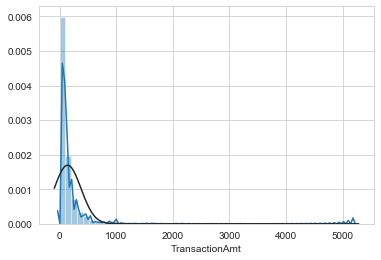

Skewness : 6.6464791958572205
Kurtosis : 72.51622140588181



**<u>Normality Check :</u>**

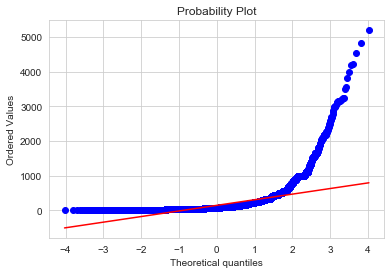

**<u>Box Plot and Visual check for Outlier  :</u>**

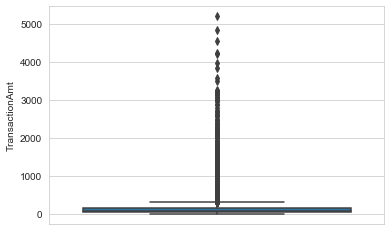

**<u>Outliers (using IQR):</u>**

  Right end outliers : 2360
  Left end outliers : 0


**<u>Bivariate plots: Relationship with Target Variable:</u>**

**<u>Explore various transformations for TransactionAmt</u>**


1. Logarithmic Transformation


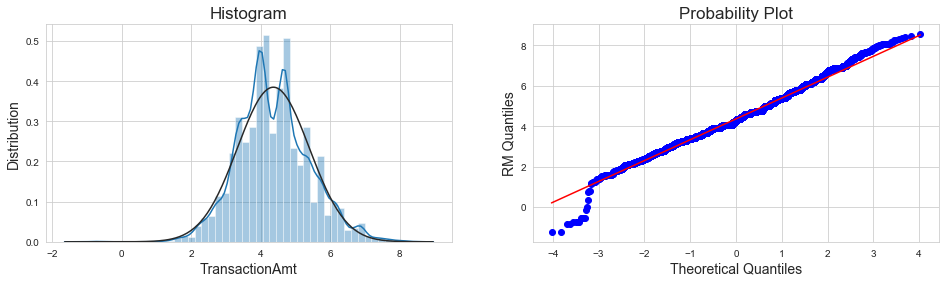

2. Exponential Transformation
Can't compute Exponential transformation
3. Square Transformation


C:\Users\lenovo\anaconda3\lib\site-packages\fast_ml\eda.py:175: RuntimeWarning: overflow encountered in exp
  s_exp = np.exp(s)


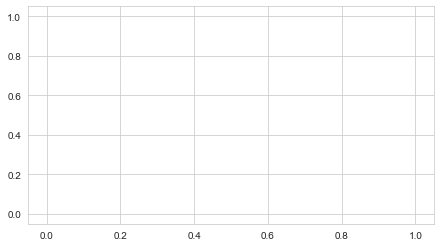

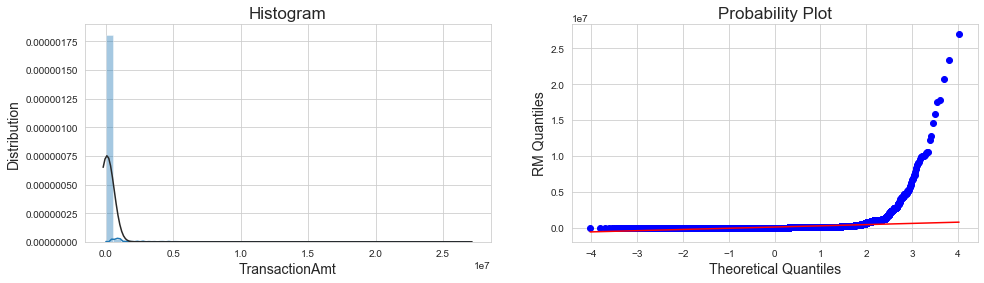

4. Square-root Transformation


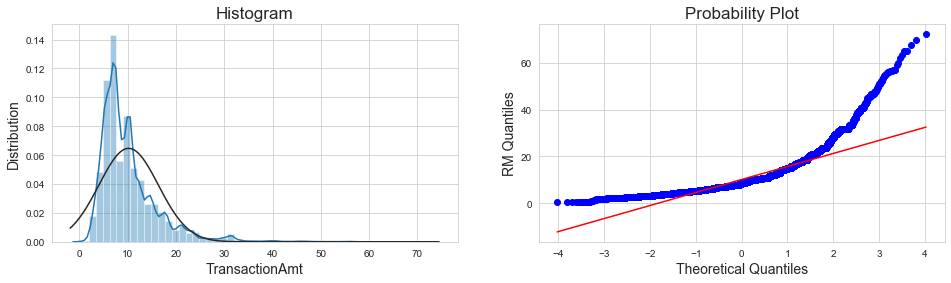

5. Box-Cox Transformation


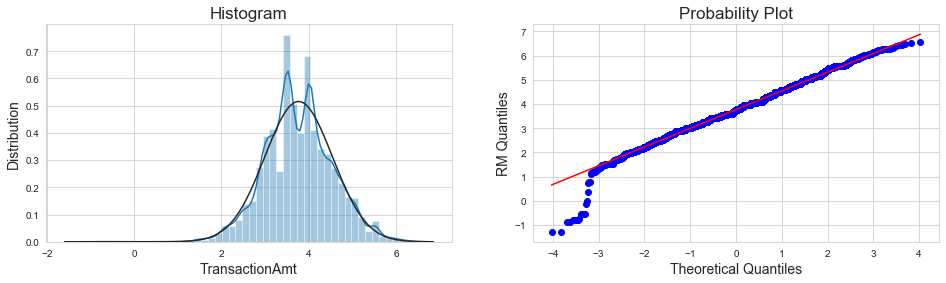

Optimal Lambda for Box-Cox transformation is : -0.0657672631233451

6. Yeo Johnson Transformation


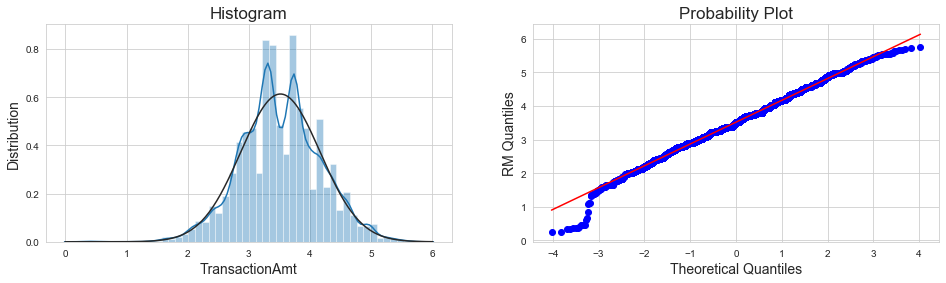

Optimal Lambda for Yeo Johnson transformation is : -0.09971659708394663



In [40]:
numerical_variable_detail(X_train, 'TransactionAmt')

**<u>Basic Info :</u>**

Total Number of observations :  24707



**<u>Cardinality of the variable :</u>**

Number of Distinct Categories (Cardinality):  12
Distinct Values :  [Interval(23.999, 33.814, closed='right')
 Interval(33.814, 47.95, closed='right')
 Interval(474.985, 884.0, closed='right')
 Interval(182.662, 311.95, closed='right')
 Interval(74.145, 100.0, closed='right')
 Interval(47.95, 57.95, closed='right')
 Interval(57.95, 74.145, closed='right')
 Interval(884.0, 5191.0, closed='right') 'Missing'
 Interval(100.0, 117.0, closed='right')
 Interval(117.0, 182.662, closed='right')
 Interval(311.95, 474.985, closed='right')]



**<u>Missing Values :</u>**

  Number : 0
  Percentage : 0.0 %


**<u>Category Plots :</u>**

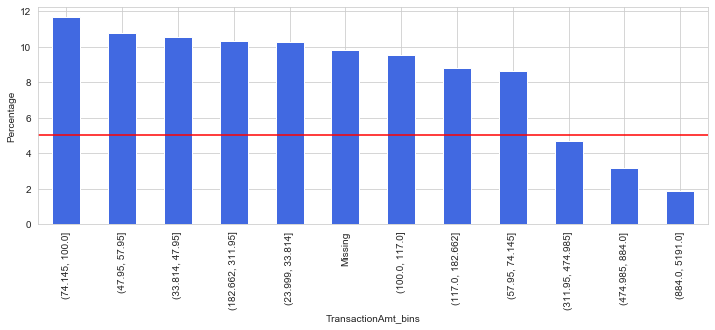

**<u>Category plot by including missing (if any) and Rare labels**

Categories less than 5 value are clubbed in Rare label


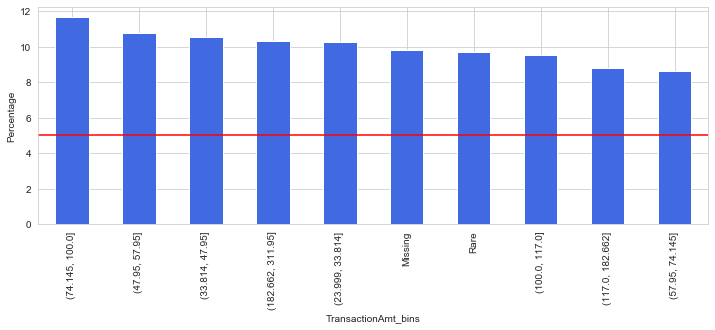

In [43]:
categorical_variable_detail(X_train, 'TransactionAmt_bins')

**TransactionAmt :** numerical_plots & categorical_plots

1. Plot for TransactionAmt


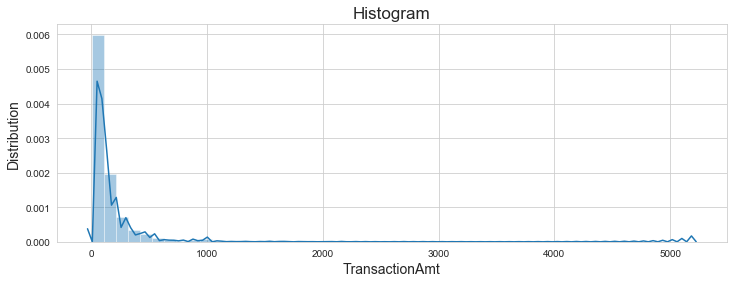

In [45]:
numerical_plots(X_train, ['TransactionAmt'])

**<u> 1. Plot for TransactionAmt_bins</u>**

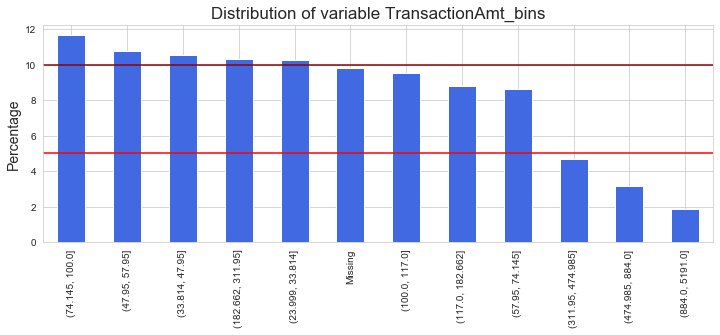

In [46]:
categorical_plots(X_train, ['TransactionAmt_bins'])

**TransactionAmt :** numerical_plots_with_target & categorical_plots_with_target

**<u> 1. Plot for TransactionAmt</u>**

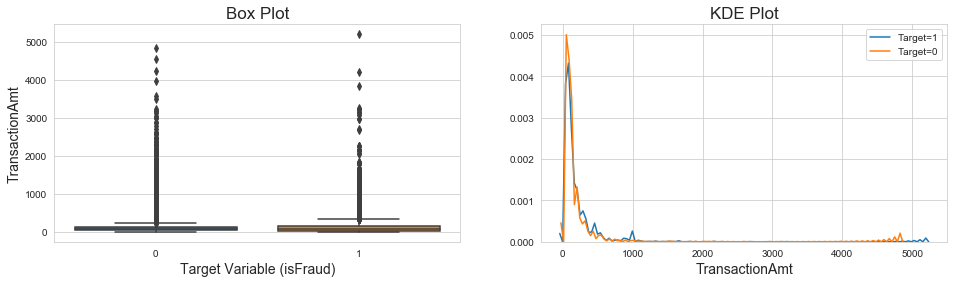

In [48]:
numerical_plots_with_target(X_train, ['TransactionAmt'], target = 'isFraud', model = 'classification')

In [51]:
X_train['TransactionAmt_bins'].value_counts()

(74.145, 100.0]      2882
(47.95, 57.95]       2665
(33.814, 47.95]      2604
(182.662, 311.95]    2551
(23.999, 33.814]     2532
Missing              2419
(100.0, 117.0]       2359
(117.0, 182.662]     2170
(57.95, 74.145]      2134
(311.95, 474.985]    1155
(474.985, 884.0]      781
(884.0, 5191.0]       455
Name: TransactionAmt_bins, dtype: int64

**<u> 1. Plot for TransactionAmt_bins</u>**

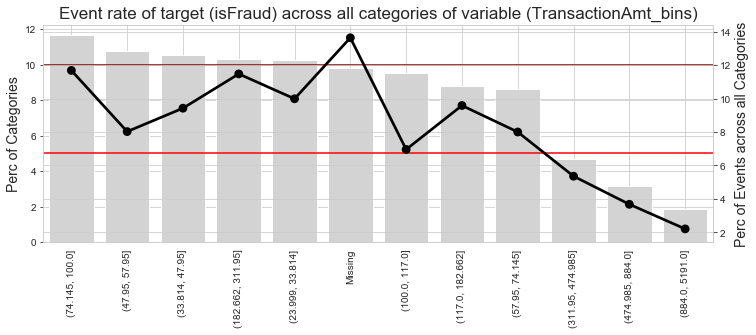

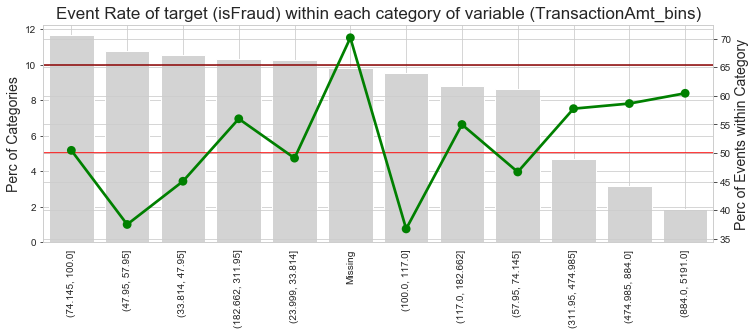

TransactionAmt_bins,"(74.145, 100.0]","(47.95, 57.95]","(33.814, 47.95]","(182.662, 311.95]","(23.999, 33.814]",Missing,"(100.0, 117.0]","(117.0, 182.662]","(57.95, 74.145]","(311.95, 474.985]","(474.985, 884.0]","(884.0, 5191.0]"
count,2882.000000,2665.000000,2604.000000,2551.000000,2532.000000,2419.000000,2359.000000,2170.000000,2134.000000,1155.000000,781.000000,455.000000
perc,11.664710,10.786417,10.539523,10.325009,10.248108,9.790748,9.547901,8.782936,8.637228,4.674789,3.161047,1.841583
isFraud,50.451076,37.485929,45.046083,55.978048,49.091627,70.152956,36.710471,54.976959,46.672915,57.748918,58.642766,60.439560


In [49]:
categorical_plots_with_target(X_train, ['TransactionAmt_bins'], target = 'isFraud')

In [54]:
def  categorical_plots_with_target(df, variables, target, model='clf', add_missing = True,  rare_tol = 5):
    """
    Parameters:
    -----------
        df : Dataframe for which Analysis to be performed
        variables : input type list. All the categorical variables needed for plotting
        target : Target variable
        model : type of problem - classification or regression
                For classification related analysis. use 'classification' or 'clf'
                For regression related analysis. use 'regression' or 'reg'
        add_missing : default True. if True it will replace missing values by 'Missing'
        rare_tol : {5 or 10}
            percentage line to demonstrate categories with very less data
    Returns:
    --------
        Category plots for all the variables
    """
    eda_df = df.copy(deep=True)
    length_df = len(eda_df)

    for i, var in enumerate(variables, 1):

#         printmd (f'**<u> {i}. Plot for {var}</u>**')

        if add_missing:
            eda_df[var] = eda_df[var].fillna('Missing')
        

        plot_df =  calculate_mean_target_per_category (eda_df, var, target)
        cat_order = list(plot_df[var])

        if model in('clf' or 'classification'):
            plot_df[target] = 100*plot_df[target]

        
        # Graph:1 to show the overall event rate across categories
        if model in ('clf', 'classification'):

            tmp = pd.crosstab(eda_df[var], eda_df[target], normalize='columns') * 100
            tmp = tmp.reset_index()
            tmp.rename(columns={0:'target_0', 1:'target_1'}, inplace=True)

            fig, ax = plt.subplots(figsize=(12,4))
            plt.xticks(plot_df.index, plot_df[var], rotation = 90)

            ax.bar(plot_df.index, plot_df['perc'], align = 'center', color = 'lightgrey')

            ax2 = ax.twinx()
            ax2 = sns.pointplot(data = tmp, x=var, y='target_1', color='black')

            ax.axhline(y=rare_tol, color = 'red')
            ax.axhline(y=rare_tol+5, color = 'darkred')

            ax.set_title(f'Event rate of target ({target}) across all categories of variable ({var})', fontsize=17)
            #ax.set_xlabel(var, fontsize=14)
            ax.set_ylabel('Perc of Categories', fontsize=14)
            ax2.set_ylabel("Perc of Events across all Categories", fontsize=14)

            plt.show()


        # Graph:2 to show the mean target value within each category
        fig, ax = plt.subplots(figsize=(12,4))
        plt.xticks(plot_df.index, plot_df[var], rotation = 90)

        ax.bar(plot_df.index, plot_df['perc'], align = 'center', color = 'lightgrey')

        ax2 = ax.twinx()
        ax2 = sns.pointplot(data = plot_df, x=var, y=target, order = cat_order, color='green')

        ax.axhline(y=rare_tol, color = 'red')
        ax.axhline(y=rare_tol+5, color = 'darkred')


        if model in('clf' or 'classification'):
            ax.set_title(f'Event Rate of target ({target}) within each category of variable ({var})', fontsize=17)
            ax2.set_ylabel("Perc of Events within Category", fontsize=14)
            #ax.set_xlabel(var, fontsize=14)
            ax.set_ylabel('Perc of Categories', fontsize=14)

        elif model in('reg' or 'regression'):
            ax.set_title(f'Mean value of target ({target}) within each category of variable ({var})', fontsize=17)
            ax2.set_ylabel('Mean Target Value', fontsize=14) 
            #ax.set_xlabel(var, fontsize=14)
            ax.set_ylabel('Perc of Categories', fontsize=14)

        plt.show()

        display_all(plot_df.set_index(var).transpose())

In [55]:
categorical_plots_with_target(X_train, ['TransactionAmt_bins'], target = 'isFraud')

NameError: name 'calculate_mean_target_per_category' is not defined

## <font color='green'> Missing Value Imputaion

In [21]:
from fast_ml.missing_data_imputation import MissingDataImputer_Categorical, MissingDataImputer_Numerical

#### <font color='brown'> Missing Value Imputation - Categorical

**Custom Value Imputer for Numeric Type Categorical Variable : Custom Value - '9999'**

In [22]:
cat_imputer = MissingDataImputer_Categorical(method = 'custom_value', value = '9999', add_indicator= False)
cat_imputer.fit(X_train, variables = cv_impute_num)

**Custom Value Imputer for Character Type Categorical Variable : Custom Value - 'Missing'**

In [23]:
cat_imputer1 = MissingDataImputer_Categorical(method = 'custom_value', value = 'Missing', add_indicator= False)
cat_imputer1.fit(X_train, variables = cv_impute_char)

**Transform Train Data**

In [24]:
X_train = cat_imputer.transform(X_train)

In [25]:
X_train = cat_imputer1.transform(X_train)

#### <font color='brown'> Missing Value Imputation - Numerical

**Missing Imputation for Numerical Variables - "Median"**

In [26]:
num_imputer = MissingDataImputer_Numerical(method = 'median', add_indicator= False)
num_imputer.fit(X_train, num_impute)

**Transform Train Data**

In [27]:
X_train = num_imputer.transform(X_train)

## <font color='green'> **Feature Engineering**

In [28]:
from fast_ml.feature_engineering import FeatureEngineering_Categorical

### <font color='brown'> Manual Encoding - Categorical Variables - Train Data

In [29]:
X_train = mail_transform(X_train, 'P_emaildomain')
X_train = mail_transform(X_train, 'R_emaildomain')
X_train = OS_transform(X_train, 'id_30')
X_train = browser_transform(X_train, 'id_31')
X_train = resol_transform(X_train, 'id_33')
X_train = device_transform(X_train, 'DeviceInfo')

### <font color='brown'> Rare Encoding for categories less than 5%

In [30]:
rare_encoder = FeatureEngineering_Categorical(method='rare')
rare_encoder.fit(X_train, variables = rare_5, rare_tol=5)

In [31]:
X_train = rare_encoder.transform(X_train)

### <font color='brown'> Rare Encoding for categories less than 10%

In [32]:
rare_encoder1 = FeatureEngineering_Categorical(method='rare')
rare_encoder1.fit(X_train, variables = rare_10, rare_tol=10)

In [33]:
X_train = rare_encoder1.transform(X_train)

### <font color='brown'> Categorical Encoding - Method = 'Label'

In [34]:
cat_encoder = FeatureEngineering_Categorical(method = 'label', model = 'classification')
cat_encoder.fit(X_train, variables = cat_var, target = 'isFraud')

**Transform Train & Validation Data**

In [35]:
X_train = cat_encoder.transform(X_train)

### <font color='brown'> Dropping the Variables which are listed

In [37]:
X_train.drop(drop_var, axis = 1)

SyntaxError: invalid syntax (<ipython-input-37-c4c3a09164eb>, line 1)

In [38]:
def transform_data(df):
    df = cat_imputer.transform(df)
    df = cat_imputer1.transform(df)
    df = num_imputer.transform(df)
    df = mail_transform(df, 'P_emaildomain')
    df = mail_transform(df, 'R_emaildomain')
    df = OS_transform(df, 'id_30')
    df = browser_transform(df, 'id_31')
    df = resol_transform(df, 'id_33')
    df = device_transform(df, 'DeviceInfo')
    df = rare_encoder.transform(df)
    df = rare_encoder1.transform(df)
    df = cat_encoder.transform(df)

In [39]:
transform_data(X_val)

## <font color='green'> Model Development

### <font color='brown'> Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier( bootstrap = True,
                              max_depth = 200,
                              max_features = 'auto',
                              max_leaf_nodes = None,
                              min_impurity_decrease = 0.0,
                              min_impurity_split = None,
                              min_samples_leaf = 1,
                              min_samples_split = 2,
                              min_weight_fraction_leaf = 0.0,
                              n_estimators = 10,
                              n_jobs = 1,
                              oob_score = False,
                              random_state = 42,
                              verbose = 0,
                              warm_start = False)
clf.fit(X = X_train,y =  y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 2)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 200, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X = X_train,y =  y_train)

### <font color='brown'> LightGBM

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, roc_curve, auc
import lightgbm as lgb

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123456,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_val)
accuracy = accuracy_score(y_val, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

### <font color='brown'> XGBoost

In [48]:
from xgboost import XGBClassifier

In [49]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)